# Régressions linéaires

Les régressions sont les modèles les plus important en analyse de données (statisitques), en data science, machine learning compris.

Ce sont des modèles :

* mathématiquement très simples (relation linéaire)
* facile à interprêter
* sobres (besoin de peu de ressources de calculs)
* en analyse statistique, il s’agit du modèle de référence pour modéliser une relation entre une variable quantitative et une ou plusieurs variables quantitatives
* en machine learning, la régression appartient à la famille des apprentissages supervisés
* c’est un modèle bien connu : la méthode d’optimisation la plus courante (moindres carrés ou OLS) est connue de longue date ([Legendre](https://journals.openedition.org/bibnum/580), puis [Guauss](https://www.persee.fr/doc/rhs_0151-4105_1989_num_42_1_4132)… en astronomie) et le terme de régression a égalemenet été forgé au XIXe s. par [Galton](https://fr.wikipedia.org/wiki/Francis_Galton) dans le cadre de recherches en anthropologie physique – régression est en fait l’abréviation de « régression vers la moyenne ». 

Dans [un article](https://www.kdnuggets.com/2018/12/supervised-learning-model-popularity-from-past-present.html) sur [KDnuggets](https://www.kdnuggets.com/), [Matthias Döring](https://www.linkedin.com/in/matthias-doering/) propose un [dataset recensant le nombre de publications en contion des méthodes de machine learning employées](https://www.datascienceblog.net/data-sets/ml_models_timeline.csv). 

Il appert de ces données que la régression linéaire – ne serait-ce que dans le domaine du machine learning − est la méthode la plus employée. Cela est d’autant plus vrai si l’on considère toutes les variantes (logistique, Poisson, Cox, ridge, lasso…). Seule les SVM (une méthode très efficace dans le domaine de la classification) pourrait rivaliser :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ml_timeline = pd.read_csv('data/ml_models_timeline.csv')
df_ml_timeline.head()

,Year,Model,Count
0,1950,Neural Network,10
1,1951,Neural Network,18
2,1952,Neural Network,11
3,1953,Neural Network,23
4,1954,Neural Network,15


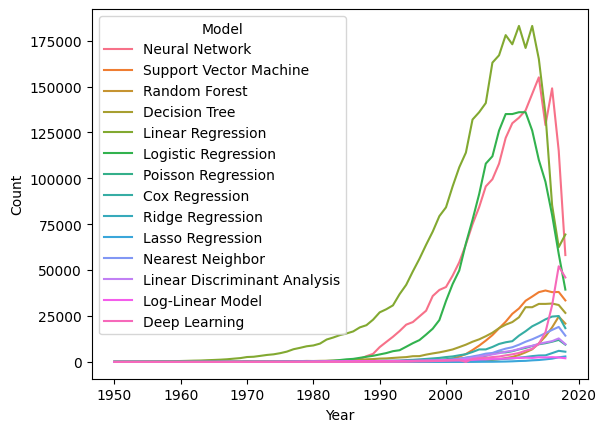

In [14]:
sns.lineplot(data=df_ml_timeline, x='Year', y='Count', hue='Model');

Et d’un point de vue historique, on peut dire que la régression linéaire était même hégémonique jusque dans les années 1990 qui a marqué le début d’un fort dévelopemment des modèles connexionnistes (renouveau lié à la (re)découverte des algorithmes de réropropagation du gradient d’erreur dans la deuxième moitié des années 80).

Régressions linéaire et logistique représentent plus de la moitié des publications. Toujours selon les données de Dörring, dans le domaine biomédical, plus de 85% des papiers rapportent la mise en œuvre d’un modèle de régression et ses variantes. C’est un modèle essentiel à connaître.

Pour enfoncer le clou, ce type de modèle continue de tenir la dragée haute à des modèles plus sophistiqués en matière de sobriété. Par exemple [Varoquaux et al. (2024)](https://arxiv.org/abs/2409.14160), dans un article passant en revue les différents points que questionne la notion de sobriété en machine learning, rapportent par exemple que [Ericksson et al. (2023)](https://pmc.ncbi.nlm.nih.gov/articles/PMC10952307/) n’ont pas trouvé de différence de performance significative entre modèles de régression, deep learning, et boosted trees qui n’ont pourtant pas le même coût computationnel (loin de là). 

Dans ce cours nous allons nous focaliser sur des *analyses* reposant sur un modèle de régression (logistique), et non du machine learning.

L’objectif dans le machine learning est de trouver les paramètres qui permettront la meilleure prédiction de la valeur d’une variable sur des données en entrée du modèle non encore observées. Cela demande la mise en œuvre d’une méthodologie particulière (créer des ensembles d’entraînement, de test, etc.) dont nous donnerons un bref aperçu à la prochaine séance. 

Dans une perspective statistique, notre objectif sera plutôt de proposer un modèle *explicatif* décrivant une relation d’un certain type (ici, linéaire) entre variables. Notre principal soucis sera alors de s’assurer de la *robustesse* de nos affirmations (via un processus d’inférence statistique tel que vu dans la séance 5), en évaluant à quel point cette relation linéaire est *significative*.

Si on comprend bien comment les variables sont liées entre elles (un des objectifs de l’EDA) alors on pourra ensuite – si notre perspective est celle de créer in fine un modèle prédictif – choisir une méthode de ML et entrainer un modèle qui prend ces variables en entrées et sortie.

Il y a deux types de régressions linéaires :

* la régression linéaire simple ou univariée : une variable quantitative explicative (ou indépendantes) -> une variable quantitative expliquée (ou dépendante)
* la régression linéaire multivariée : plusieurs variables quantitatives explicatives (ou indépendantes) -> une variable quantitative expliquée (ou dépendante

Note : vous avez normalement vu dans le module de mathématiques les modèles abordés ici en détail. Nous n’y reviendrons pas, à par quelques formmules et définitions qui serviront de rappels pour poser les idées.

## Régression linéaire simple

### Première approche
 
Pour détecter des patterns dans les jeux de données que nous explorons, nous avons vu l’intérêt des tables de corrélations afin de repérer des relations linéaires entre variable, avec une estimation de la force de ces relations. Une corrélation de 1 ou -1 implique une relation de proportionnalité totale entre les deux variables, les valeurs intermédiaires indiquant le degré de dépendance linéaire entre les vairables.

La régression linéaire propose d’expliciter cette relation linéaire avec un modèle linéaire :

$$ Var_{expliquée} = \beta . Var_{explicative} + \alpha $$

Tout l’enjeu sera de déterminer les valeurs de *β* et *α*. 

Reprenons le jeu de données `tips` vu dans la séance 2 (dataviz), et affichons un résumé statistique et la table de corrélation entre les variables quantitatives :

In [2]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
# pour faciliter la lecture, on peut arrondir la valeur des statistiques

# si on veut se la péter :
tips_df.describe().map(lambda x: round(x, 2))

# si on veut être lisible :
# round(tips_df.describe(),2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


On a le sentiment que plus le montant de l’addition est élevé, plus le pourboire sera important. La dispersion de la taille des repas étant moins importante la relation semble toujours positive, mais plus ténue en matière de distribution. 

#### Corrélations

Voyons les corrélations linéaires :

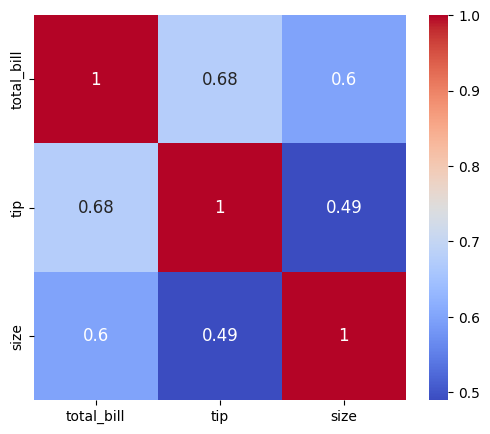

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(tips_df[['total_bill', 'tip', 'size']].corr(), 
            cmap='coolwarm', 
            annot = True, # affiche les valeurs dans les cellules
            annot_kws={"size": 12}); # taille des chiffres dans les cellulles

La corrélation (positive) la plus forte est en effet entre le montant de l’addition et celui du pourboire : *r* > 0.5. Pour la taille du repas, la corrélation n’atteint pas 0.5. Vérifions cela graphiquement :

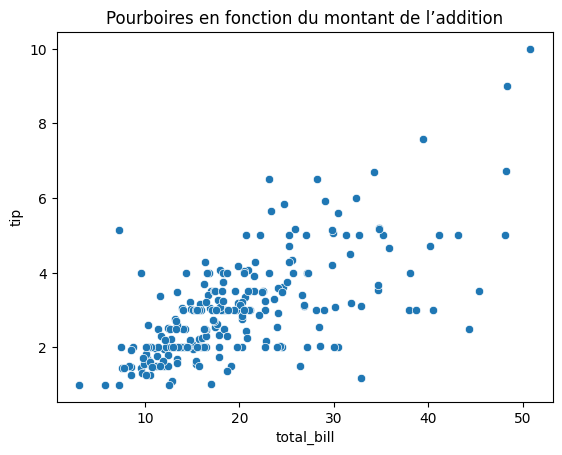

In [23]:
sns.scatterplot(x="total_bill", y="tip", data=tips_df).set_title('Pourboires en fonction du montant de l’addition');

La relation de proportionalité (linéarité) entre les variable se distingue « à l’œil nu », même si cela ne fait naître qu’une intuition, et que des calculs sont nécessaires pour quantifier précisément cette proportionalité. On distingue aussi que la variabilité des pourboires les plus élevés est très importantes pour les additions les plus élevées. Cela peut poser des problèmes, nous y reviendrons plus tard.

#### Approche dataviz

Nous avions vu également comment avec Seaborn nous pouvions tracer la droite de régression :

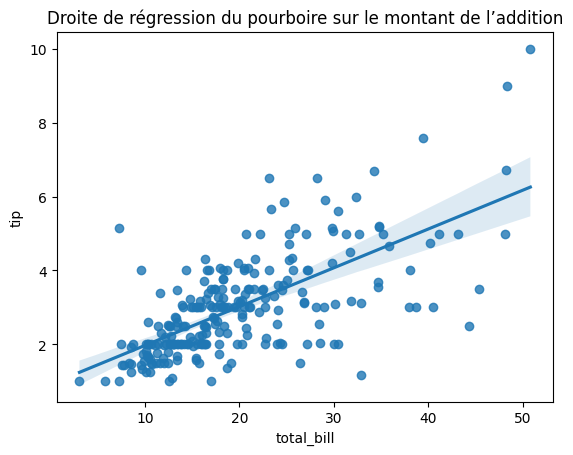

In [24]:
sns.regplot(x='total_bill', y='tip', data=tips_df).set_title('Droite de régression du pourboire sur le montant de l’addition');

Attention à l’interprétation !!!

Même si l’on emploi la notion « d’explication » dans le vocabulaire de l’analyse statistique, cela ne vaut pas causalité. On ne peut pas interpréter notre modèle en concluant qu’une addition élevée *cause* ou provoque le versement d’un pourboire élevé. Il faut plutôt dire :

* les pourboires des repas avec une addition élévée sont plus important
* une bonne partie de la variabilité (variance) des pourboires est *expliquée* par le montant de l’addition (c’est là qu’intervient la notion d’explication)

Il existe des analyses statistiques qui permettent de conclure à une relation de causalité, comme les [analyses de médiation](https://theses.hal.science/tel-03194558) par exemple. Mais elles demandent plusieurs analyses complémentaire et impliquent l’intervention d’une variable intermédiaire dont on va (schématiqueemnt) tenter de mesurer l’effet quand elle est présente ou pas. Ce n’est absolument pas le cas ici où l’on met simplement en relation deux variables.

On peut caractériser (quantifier) cette relation : 

* quand on dit que les additions élevées sont associées à des pourboires plus importants, on peut quantifier cela avec le coefficient de corrélation *β* : les additions de 1\\$ plus élevées, ont des pourboires β\\$ plus élevés
*  quand on dit qu’une partie de la variance des pourboires est expliquée par le montant de l’addition, on peut quantifier cette part expliquée grâce au coefficient de corrélation.
*  *r<sup>2</sup>* est plus souvent utilisé que la simple corrélation *r*, car il rend compte de la *qualité* (explicative – en terme de variance) du modèle. **Attention, *r<sup>2</sup>* n’indique pas la *force* de l’impact du montant de l’addition sur les pourboires**. Pour se le représenter facilement, plus *r<sup>2</sup>* est petit, plus les points vont être dispersés autour de la droite de régression (car une bonne part de leur variance n’est pas expliquée ou contrôlée par notre variable explicative). Cette dispersion est *l’erreur*, la part de variance qui n’est pas expliquée par notre modèle (qui vient donc d’autres facteurs non pris en compte et que nous ingorons).

Pour visualiser cela, créons artificiellement deux ensemble de données qui obéissent à une relation linéaire (équation de droite) avec les même paramètres, mais « bruité » de manière uniforme. Un jeu étant plus bruité que l’autre :

In [89]:
beta = 0.3
alpha = 5

x = 3 * np.random.rand(100, 1)

erreur1 = np.random.randn(100, 1) * 0.8
y1 = beta * x + alpha + erreur1

erreur2 = np.random.randn(100, 1) * 0.1
y2 = beta * x + alpha + erreur2


In [90]:
from scipy.stats import pearsonr     
r1 = pearsonr(x, y1)[0][0]
r2 = pearsonr(x, y2)[0][0]

print(f'r1 carré = {r1**2} et r2 carré = {r2**2}') 

r1 carré = 0.0938001311716506 et r2 carré = 0.8544350143623013


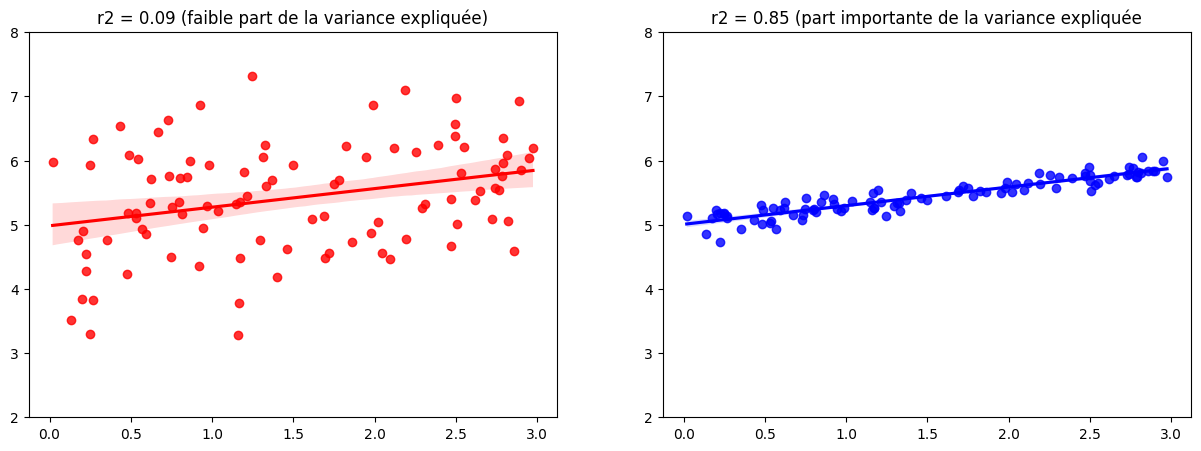

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g1 = sns.regplot(x=x, y=y1, color='r')
g1.set_ylim(2, 8) 
g1.set_title(f'r2 = {round(r1**2,2)} (faible part de la variance expliquée)')
plt.subplot(1,2,2)
g2 = sns.regplot(x=x, y=y2, color='b')
g2.set_ylim(2, 8) 
g2.set_title(f'r2 = {round(r2**2,2)} (part importante de la variance expliquée')
plt.show()

On remarque naturellement que cela a un effet également sur l’intervale de confiance.

D’ailleurs imaginons que l’on prenne un sous-échantillon au hasard pour évaluer notre modèle dans chaque cas, quel serait l’effet sur l’intervalle de confiance ?

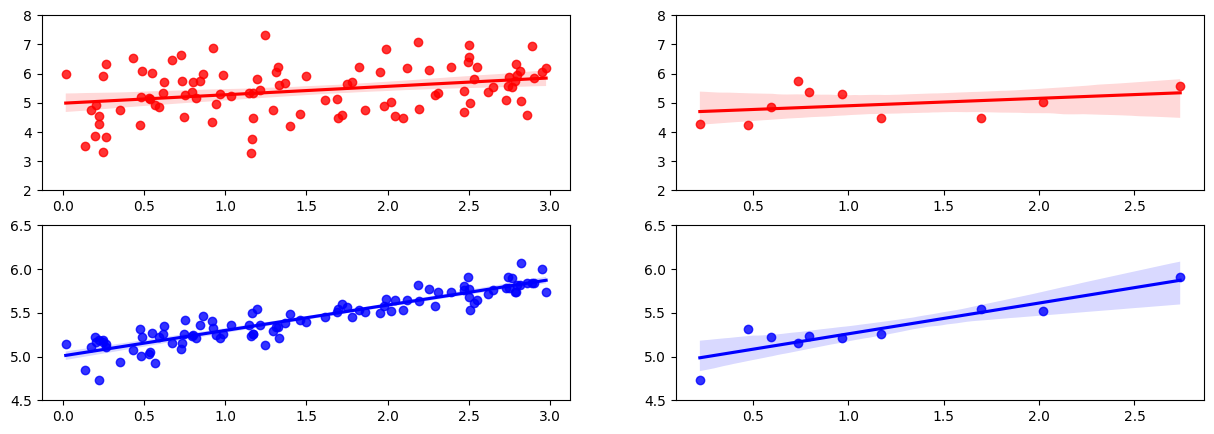

In [97]:
n = len(x)
idx_sample = np.random.choice(n, size=10, replace=False) # on choisit 10 index aux hasard pour constituer nos sous-échantillons
x_sample = x[idx_sample]
y1_sample = y1[idx_sample]
y2_sample = y2[idx_sample]

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
g1 = sns.regplot(x=x, y=y1, color='r')
g1.set_ylim(2, 8) 
plt.subplot(2,2,2)
g2 = sns.regplot(x=x_sample, y=y1_sample, color='r')
g2.set_ylim(2, 8) 
plt.subplot(2,2,3)
g3 = sns.regplot(x=x, y=y2, color='b')
g3.set_ylim(4.5, 6.5) 
plt.subplot(2,2,4)
g3 = sns.regplot(x=x_sample, y=y2_sample, color='b')
g3.set_ylim(4.5, 6.5)
plt.show()

Quand on veut comparer facilement les `regplot` dans un  dataframe, on peut utiliser `sns.lmplot()` :

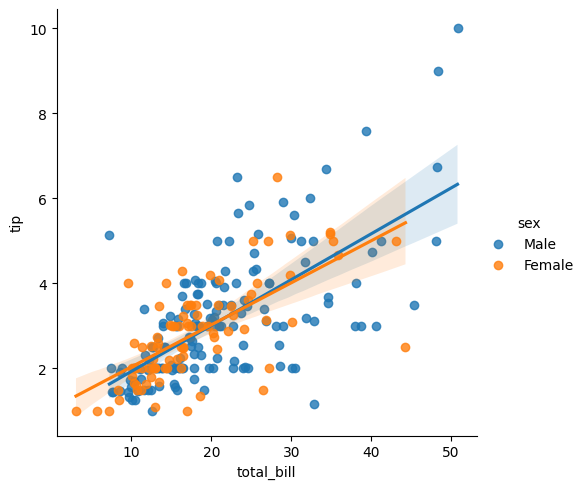

In [99]:
sns.lmplot(data=tips_df, x="total_bill", y="tip", hue="sex");

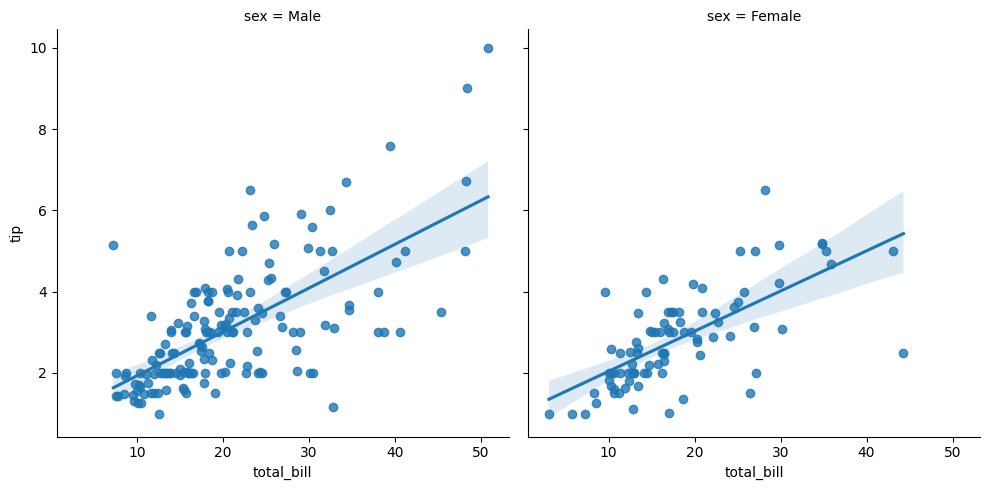

In [102]:
sns.lmplot(data=tips_df, x="total_bill", y="tip", col="sex");

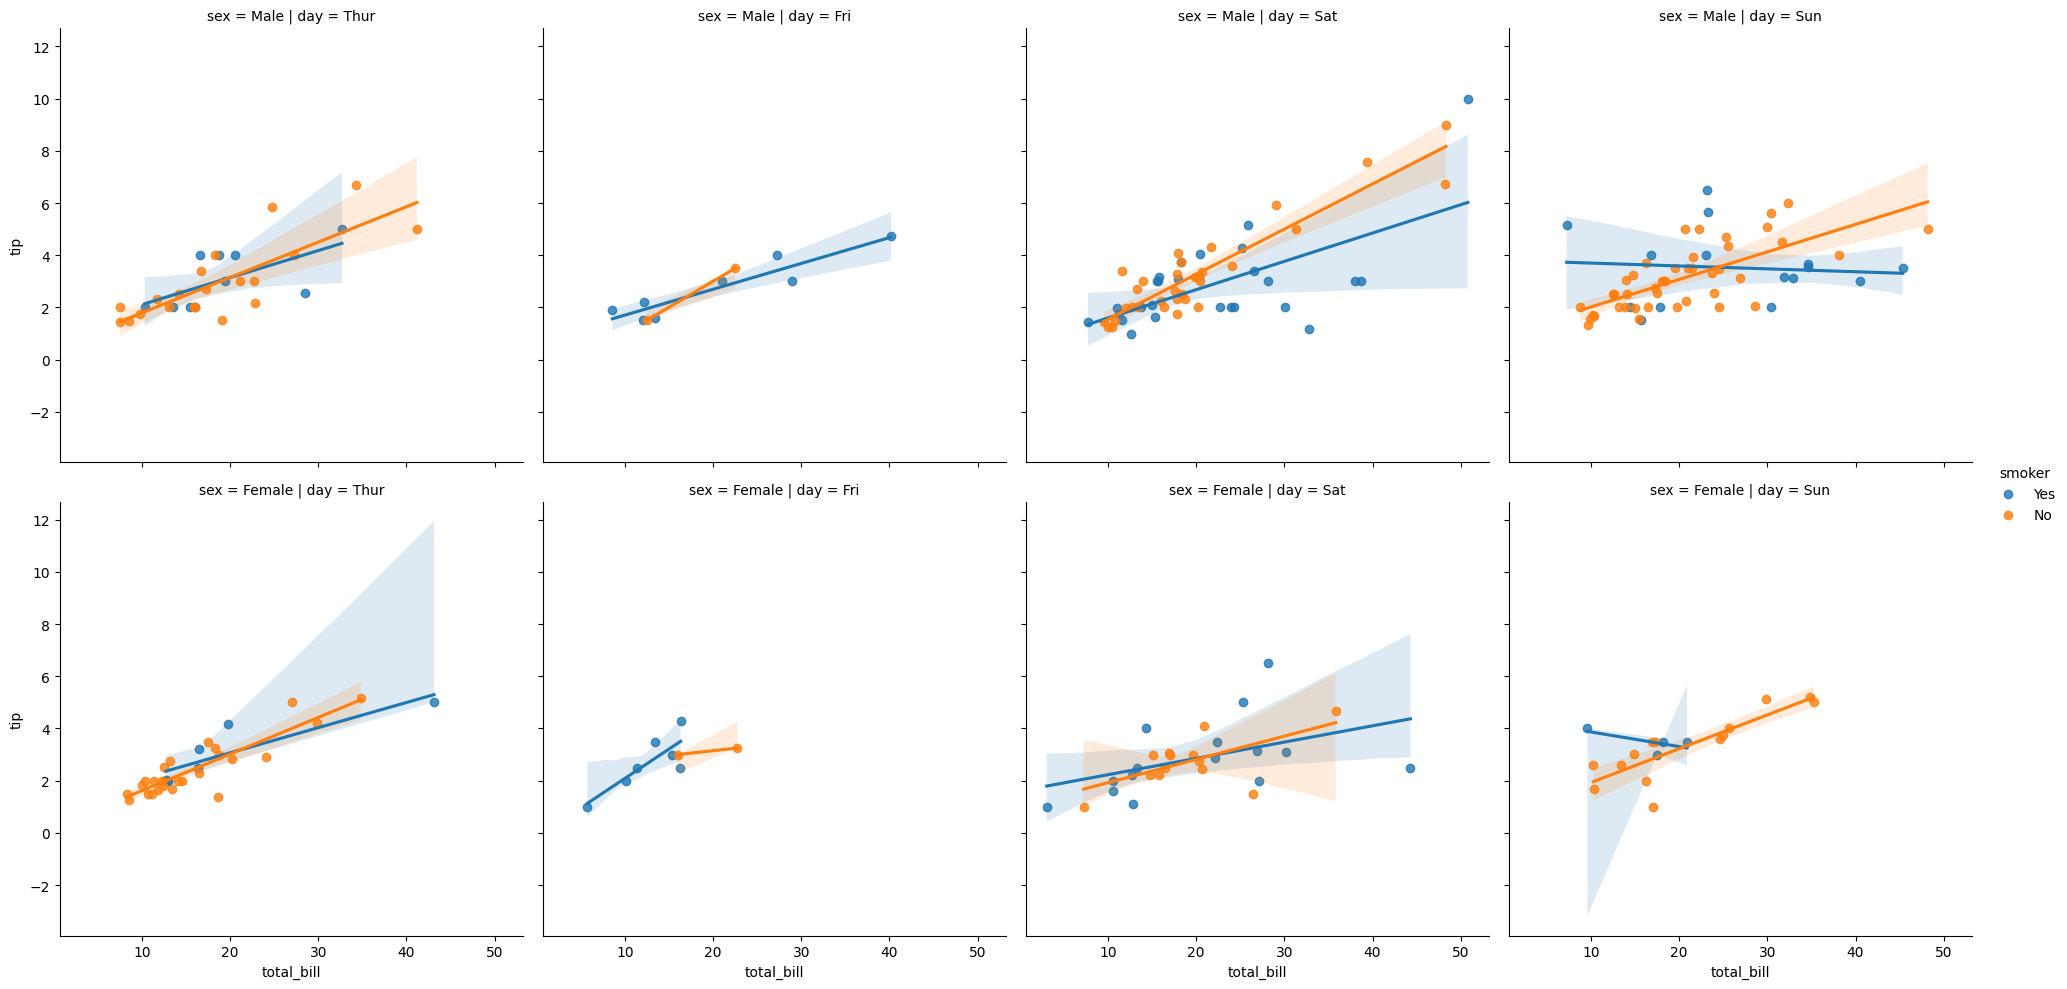

In [110]:
sns.lmplot(data=tips_df, x="total_bill", y="tip", col="day", row='sex', hue='smoker');

C’est bien beau mais comment quantifier précisément les paramètres, l’erreur, la qualité des modèles etc. ?

### Modèle statistique : estimation des paramètres et bibliothèque `statsmodels`

La bibliothèque de référence pour le ML est `scikit-learn`. Mais si l’on s’en tient à une approche d’exploration et d‘analyse des données, [la bibliothèque `statsmodels`](https://www.statsmodels.org/stable/index.html) est très intéressante : elle est très facile à utiliser avec une API `formula` qui reprend le format de notation `patsy` [(lien)](https://patsy.readthedocs.io/en/latest/) avec laquelle les utilisateur-ice-s de `R` [(lien)](https://www.r-project.org/) sont déjà familier-ère-s.

Par exemple, pour une régression du montant des pourboires sur les montants des additions :

In [112]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 8.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 7.7 MB/s eta 0:00:00


Les étapes sont globalement les étapes que l’on retrouvera à chaque fois que l’on va chercher à établir un modèle :

- import des modules contenants les modèles
- assignation des variables (expliquée et explicative-s)
- définition du modèle (la « formule » en quelque sorte) et de la méthode d’estimation (dans le cas de la régression simple, l’estimation se fera par la méthode des moindres carrées (OLS)
- estimation des paramètres du modèle avec une méthode généralement appelée `.fit()`
- lecture et interprétation des résultats et évaluation de la performance du modèle, aidé par de nombreux indices statistique (intervalles de confiance, erreur standard, *r<sup>2</sup>*, indice de Fisher…) 

In [3]:
import statsmodels.api as sm

In [4]:
Y= tips_df['tip'].tolist() # variable expliquée
X = tips_df['total_bill'].tolist() # variable explicative
X = sm.add_constant(X) # ajout du terme constant
model = sm.OLS(Y, X) # instanciation du modèle, estimation à l’aide de la méthode des moindres carrés
result = model.fit() # estimation des paramètres du modèle
result.params # lecture de la valeur des paramètres

array([0.92026961, 0.10502452])

La méthode `.summary()` nous livre les principaux indicateurs statistiques, erreur, test de significativité, etc. :

In [159]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.69e-34
Time:                        00:24:10   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
x1             0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* En haut à gauche on retrouve un résumé du modèle (variable, type, méthode d’estimation…) et de l’échantillon (nombre d’observation, degrés de liberté…)
* En haut à droite sont affichés les indices statistiques qui portent sur le modèle dans sa globalité : Fisher, *r<sup>2</sup>, AIC (utile pour comparer des modèles entre eux), etc.
* En bas on a, paramètre par paramètre, erreur standard, leur significativité (test de Student), intervalle de confiance, etc.

Rappel sur l’indice de Fisher : correspond à l’hypothèse nulle « tous les paramètres sont égaux à 0 ». Plus la valeur de F est grande, plus le modèle a de chance d’être statistiquement significatif, c’est à dire qu’au moins un des paramètres est significativement différent de 0. Si la valeur de F est proche de 1, alors on ne peut pas rejeter l’hypothèse nulle. Attention, F est un indice doté de degrés de liberté, notamment liés à la taille de l’échantillon et au nombre de paramètres du modèle. Pour chaque taille d’échantillon et chaque modèle (notamment lorsque l’on considère plusieurs variables, donc plusieurs paramètres) le seuil de significativité associé à F a une valeur spécifique.

Les objets liés au modèle (retourné par `.OLS()` et au résultat (retourné par `.fit()`) disposent de différents attributs et méthodes (comme `.summary()` par exemple) :

* Les variables / paramètres du modèle sont accessibles via les attributs `.endog_names` (variable endogène -> variable expliquées) et `.exog_names`(variable exogènes -> variables explicatives) :

In [8]:
model.endog_names

'tip'

In [157]:
model.exog_names

['const', 'x1']

* `statsmodels` propose également une API qui via `patsy` permet de définir les modèles de manière plus intuitive ou lisible, qui est très proche de la manière dont on procède avec `R` :

In [4]:
import statsmodels.formula.api as smf

In [5]:
model = smf.ols(formula = 'tip ~ total_bill', data=tips_df)
result = model.fit()
result.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

La présentation des paramètres est également plus lisible.

* L’objet retourné par cette méthode `.ols()` (qui se distingue par le fait qu’elle est écrite en minuscule) dispose également des attributs `.endog_names` et `.exog_names` – ici aussi plus lisibles – mais aussi de l’attribut `.formula` :

In [163]:
model.endog_names

'tip'

In [164]:
model.exog_names

['Intercept', 'total_bill']

In [165]:
model.formula

'tip ~ total_bill'

* bien sûr on dispose également de `.summary()` :

In [166]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           6.69e-34
Time:                        00:31:23   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* On peut accéder directement à certains indices comme des attributs de l’objet retourné par la méthode `.fit()` (que nous avons nommé `result`) :

In [170]:
result.rsquared

np.float64(0.45661658635167657)

* l’objet retourné par la méthode `.fit()` (result/fitted) dispose d’une méthode `.predict()` qui permet de générer les valeurs prédites par le modèle. On l’utilise souvent en lui donnant pour argument les valeurs réelles des variables indépendantes afin de comparer valeurs prédites / valeurs observées :

In [38]:
result.predict(tips_df['total_bill']).head()

0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64

Attention, si on n’utilise pas le formalisme `patsy` pour notre modèle (méthode `.OLS()` de l’API de base, et non `.ols()`), il faut ajouter une colonne pour l’intercept avec la méthode `.add_constant()` :

In [65]:
model2 = sm.OLS(Y, X) # X et Y définie plus haut
result2 = model.fit()
predicted_tips = result2.predict(sm.add_constant(np.asarray(tips_df['total_bill'])))

Si l’on veut prédire une valeur unique (par exemple quel pourboire pour une addition de 50$ ?), le modèle décrit avec le formalisme `patsy` attend un DataFrame ou une Series :

In [43]:
result.predict(pd.DataFrame({'total_bill': [50.0]}))

0    6.171495
dtype: float64

On peut utiliser ces valeurs prédites pour tracer la droite de régression :

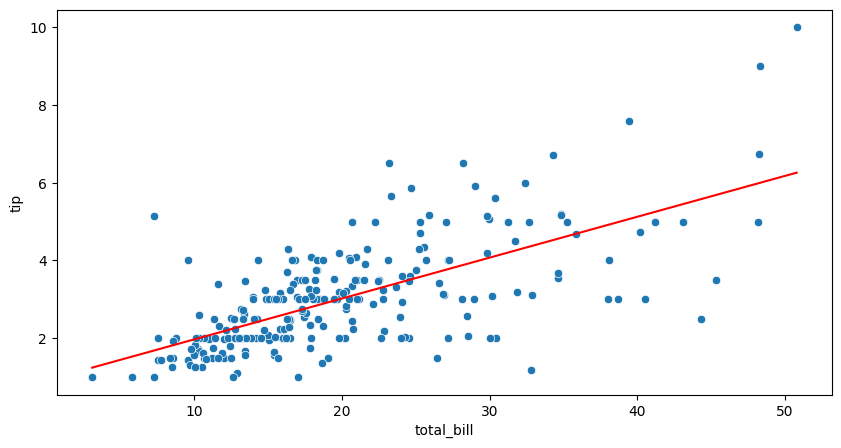

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='total_bill', y='tip', data=tips_df, ax=ax)
sns.lineplot(x=tips_df['total_bill'], y=predicted_tips, color='r', ax=ax);


### Variables catégorielles (ou qualitatives)

La régression est un modèle qui originellement était destiné à expliquer la vairance d’une variable quantitative par une autre variable qualitative. Pour les variables catégorielle on utilise un autre modèle appelé ANOVA (analyse de la variance). Mais on peut tout de même utiliser la régression simple dans le cas d’une variable catégorielle particulière : si elle est binaire. Dans notre exemple il pourrait s’agir de la variable sex (male/female), time (lunch/dinner) ou encore smoker/non-smoker. On peut simplement remplacer ces variables par une valeur numérique, en les codant de manière binaire : 0 pour male, et 1 pour female par exemple. 

Dans ce cas on va indiquer à `statsmodels` qu ’on veut utiliser une variable catégorielle qu’on va encoder :


In [73]:
model_cat = smf.ols(formula='tip ~ C(sex)', data=tips_df)
model_cat.fit().params

Intercept           3.089618
C(sex)[T.Female]   -0.256170
dtype: float64

L’intercept est la valeur prédite pour le groupe par défaut (ici le groupe `male`), et *β* de combien évolue la variable expliquée quand on « passe » à l’autre groupe (`female` ici).

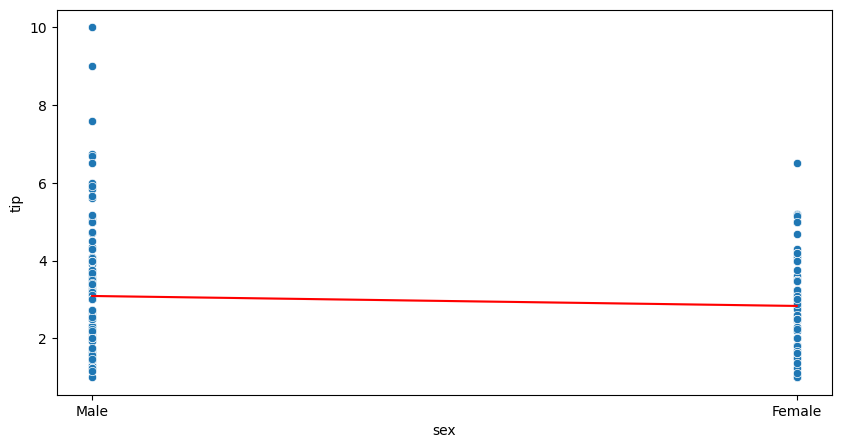

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='sex', y='tip', data=tips_df, ax=ax)
sns.lineplot(x=tips_df['sex'], y=model_cat.fit().predict(tips_df['sex']), color='r', ax=ax);

Voyons si on peut faire confiance à ce modèle :

In [16]:
model_cat.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.926
Date:                Mon, 17 Feb 2025   Prob (F-statistic):              0.166
Time:                        10:17:03   Log-Likelihood:                -423.98
No. Observations:                 244   AIC:                             852.0
Df Residuals:                     242   BIC:                             859.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0896      0.110     28.032      0.000       2.873       3.307
C(sex)[T.Female]    -0.2562      0.185     -1.388      0.166      -0.620       0.107
==============================================================================
Omnibus:                       75.995   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.975
Skew:                           1.415   Prob(JB):                     4.59e-43
Kurtosis:                       6.342   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quelles sont vos conclusions à la lecture de ce tableau ?

<votre réponse ici>

Si l’on dispose de plus de catégories (comme les jours de la semaine dans notre exemple), le codage est plus compliqué et sera décomposé en plusieurs variables (une de moins que le nombre de catégories), nous y reviendrons dans la section ci-dessous sur la régression multivariée.

### Analyse des résidus

La régression est un outil puissant, mais on ne peut pas l’utiliser à tort et à travers. Il y a des conditions précises de validité d’emploi de ce type de modèle :

* échantillonage aléatoire
* échantillonage indépendant (rappel : un échantillonage avec remplacement est acceptable si n < 10% de la population)
* homoscédasticité (distribution normale des résidus, et variance égale des résidus)

Si les deux premières conditions sont vérifiables en évaluant la méthode retenu pour l’échantillonage, vérifier l’homoscédasticité demande des analyses spécifiques. 

Une première étape est une inspection visuelle. Pour cela :

- calculer les valeurs prédites par le modèle
- retrancher les valeurs observées : cela nous donne les résidus (erreur)
- afficher un histogramme des résidus : la moyenne devrait être autour de 0 et la distribution normale (ou faire un test de normalité)
- afficher un scatterplot entre les valeurs prédites et les résidus. Vérifier qu’aucun pattern n’apparaît



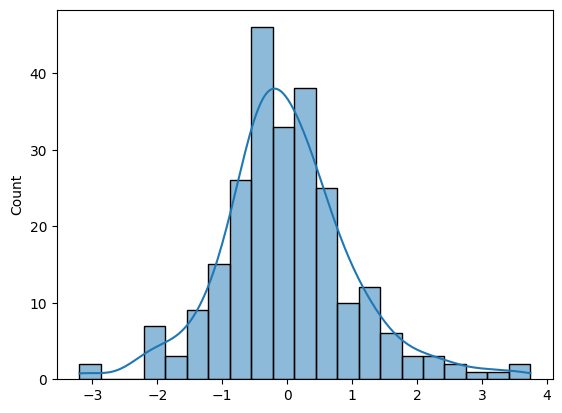

In [6]:
predicted_tips = result.predict(tips_df['total_bill'])
residuals = tips_df['tip'] - predicted_tips 
sns.histplot(residuals, kde=True);


En réalité, la classe `Results()` de `statsmodels` possède un attribut `.resid` qui permet d’accéder directement aux résidus : 

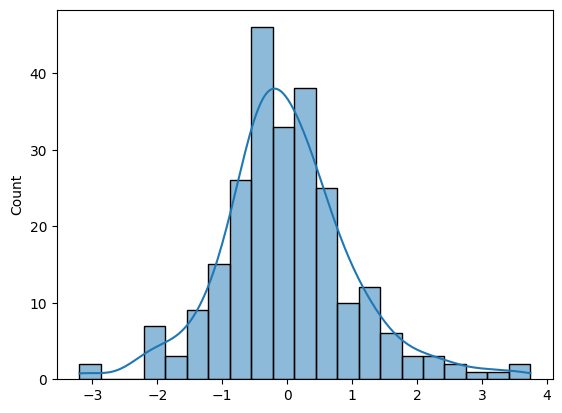

In [7]:
sns.histplot(result.resid, kde=True);

Plutôt que dessiner un simple `scatterplot()`, on peut avec un `regplot()` avoir un aperçu des tendances :

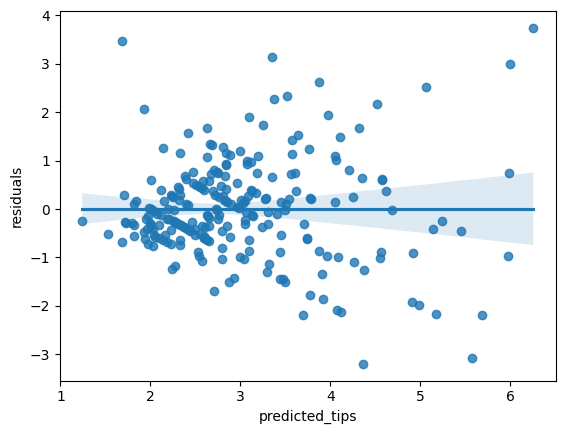

In [12]:
g = sns.regplot(x=predicted_tips, y=residuals)
g.set_xlabel('predicted_tips')
g.set_ylabel('residuals');

#### QQ-plot

Il existe une méthode pour apprécier graphiquement très rapidemnet si une distribution est normale : les QQ-plot

1. on calcule les quantiles pour nos données, on note les valeurs
2. on regarde où tombe ces quantiles sur une distribution normale
3. on trace un scatterplot valeurs sur la normale (théorique) / valeurs sur nos données (réelles)
4. si nos données // à une normale, on devrait voir une droite. Si non, c’est qu’il y a une « distortion » dans la distribution // à une normale

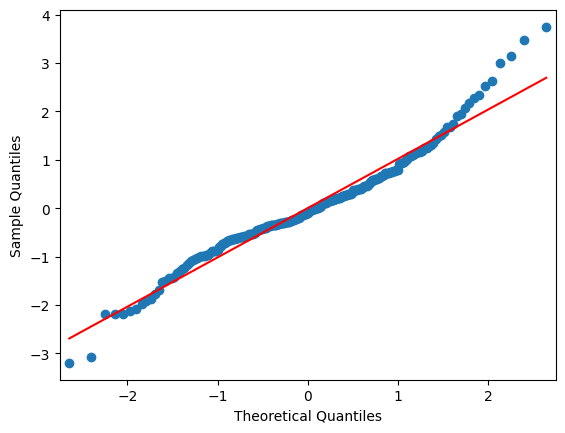

In [8]:
sm.qqplot(residuals, line='s');

#### Interprétation des résidus ?

Dans nootre exemple, si la distribution semble parfaitement normale (avec peut-être une légère dissymétrie), on voit clairement apparaître un pattern dans le diagramme residus vs. predicted/fitted : la variance augmente légèrement pour les prédictions des pourboires les plus élevés (ce que l’on suspectait déjà par l’observation des données brutes). Il est possible qu’une autre variable ou un phénomène particulier intervienne dans le processus à l’origine des hauts pourboires.

On peut observer toute sortes de patterns, mais en général ce qui nous alerte est une augmentation (ou une diminution) de la variance. C’est souvent le signe qu’une autre variable intervient.

Que faire dans ce cas ? On reste dans une optique d’exploration et de préparation des données : 

* rechercher si d’autres variables peuvent intervenir
* voir si une transformation de la variable (`log()`, etc.) améliore les choses
* opter pour un autre modèle (peut être que la relation entre variable n’est pas linéaire).

Note : se méfier de la temporalité (phénomène d’inflation avec le temps sont très courants, ou périodicité), on en revient à une bonne compréhension des phénomènes, observation, méthode d’acquisition, connaissance métier… afin de bien prendre en compte tous les facteurs qui peuvent avoir une influence.

Ensuite, il existe des tests d’hétéroscédasticité : les tests de Breusch-Pagan et de White, accessible respectivement avec `het_breuschpagan` et `het_white` dans le module `diagnostics` :

Breusch-Pagan : régression des carrés des résidus sur les variables indépendantes. Hypothèse nulle : pas d’hétéroscédasticité. Si le test est significatif, alors cela suggère que les conditions d’homoscédasticité ne sont pas remplies.

White : teste une relation entre les carrés des résidus et les variables indépendantes (sans hypothèse particulière sur le type de relations à l’inverse de Breusch-Pagan). Comme précédemment un test significatif suggère que les conditions d’homoscédasticité ne sont pas remplies.

Ces tests appartiennent au module `diagnostic`.

Test de Breusch-Pagan (il faut ajouter un terme constant aux variables indépendantes testées avec `.add_constant()`) :

In [7]:
import statsmodels.stats.diagnostic as smd

In [10]:
bp_test_results = smd.het_breuschpagan(resid=result.resid, exog_het=sm.add_constant(np.asarray(tips_df['total_bill'])))
bp_test_results

(np.float64(47.87649804810729),
 np.float64(4.539304189768232e-12),
 np.float64(59.075594777437374),
 np.float64(3.7855107811770134e-13))

Tous les paramètres de la régression sont (très) significatifs : les conditions d’homoscédasticité ne sont pas remplies.

Test de White (qui ne fait pas d’hypothèse sur la forme de la relation fonctionnelle entre les résidus et la variable indépnedante) :

In [12]:
w_test_results = smd.het_white(resid=result.resid, exog=sm.add_constant(np.asarray(tips_df['total_bill'])))
w_test_results

(np.float64(59.94872593718976),
 np.float64(9.600626274967766e-14),
 np.float64(39.24896207437351),
 np.float64(1.7565265345404497e-15))

De même pour le test de White.

## Régression multivariée

### Modèle

La régression simple est une relation linéaire à une seule dimension (une seule variable indépendante). On peut vouloir considérer simultanément plusieurs variables, chacune expliquant une part – plus ou moins importante – de la variance de la variable dépendante. La régression est alors une combinaison linéaire : 

$$ Var_{expliquée} = \beta_{1} . Var_{explicative_1} + \beta_{2} . Var_{explicative_2} + … +\beta_{n} . Var_{explicative_n} + \alpha $$

Pour estimer la part de chaque variable explicative, on va estimer un paramètre, plus un terme constant (*intercept*).
La spécification du modèle est presque aussi simple que pour la régression simple (oui, on garde les mêmes données, même si on a vu que l’homoscédasticité c’était pas trop ça, YOLO!, c’est juste dans un but d’illustration) : 

In [14]:
multi_model = smf.ols(formula='tip ~ total_bill + size', data=tips_df)
multi_result = multi_model.fit()
multi_result.params

Intercept     0.668945
total_bill    0.092713
size          0.192598
dtype: float64

L’interprétation est par contre est un peu plus complexe. Par exemple le paramètre attaché à `total_bill` signifie que pour une variation de 1\\$ sur l’addition, le pourboire varira de 0.092713\\$, mais comme il y a d’autre paramètres qui peuvent expliquer des variations aussi, c’est en précisant que *les autres variables sont maintenues égales par ailleurs* (=constantes).

### Qualité du modèle

Par ailleurs, le fait qu’il y ait plusieurs variables, comment estimer la qualité du modèle comme on le faisait pour la régression simple avec *r<sup>2</sup>* ?

En effet *r* rend compte de la relation linéaire entre deux variables. Quel indice pourrait jouer le même rôle avec plus de deux variables ?

Revenons aux résidus. Si l’on considère la qualité d’une modèle c’est quel pourcentage de variance il est capable d’expliquer, en minimisant la part des erreurs (résidus), un bon indice serait juste le ratio résidus sur moyenne (en fait les sommes de carrés). Pourquoi la moyenne ? Car en général le modèle le plus basique que l’on puisse créé est un modèle qui prédit la moyenne. On obtiendrait ainsi un indice de qualité du modèle en le comparant à un modèle de référence de base : la moyenne. Le modèle avec la meilleure qualité serait un modèle où l’erreur serait réduite à 0. Par analogie avec *r<sup>2</sup>*, on peut fixer par convention que ce modèle le plus qualitatif obtienne un score de 1. Une formule qui correspond à cette situation serait :

$$ 1 - \frac{SC_{residus}}{SC_{moyen}} = R^{2}$$

On appelle cet indice *R<sup>2</sup>* par analogie, mais ce n’est pas un carré : il peut être négatif si la somme des carrés des résidus est plus grande que la somme des carrés moyens !

Ainsi :

* *R<sup>2</sup>* = 1 : toute la variance est expliquée par les variables indépendantes
* *R<sup>2</sup>* > 0 : le modèle est meilleur que la prédiction par la moyenne
* *R<sup>2</sup>* = 0 : le modèle est équivalent à prédire la moyenne
* *R<sup>2</sup>* < 0 : un modèle linéaire est si peu adapté aux données qu’un modèle de prédiction par la moyenne est meilleur

In [15]:
multi_result.rsquared

np.float64(0.46786930879612587)

### Visualisation

Une régression multiple, multidimentionnelle, est difficile à représenter graphiquement. De la même manière qu’un coefficient de régression multivariée s’interprête en maintenant les autres paramètres constants, il est plus aisé de créer des représentations grahiques pour chaque paramètre en maintenant les autres constants (affichage en grille). `statsmodels` possède des méthodes pour tracer des graphiques (module `graphics`) dont la méthode `.plot_partregress_grid()` qui nous intéresse ici :

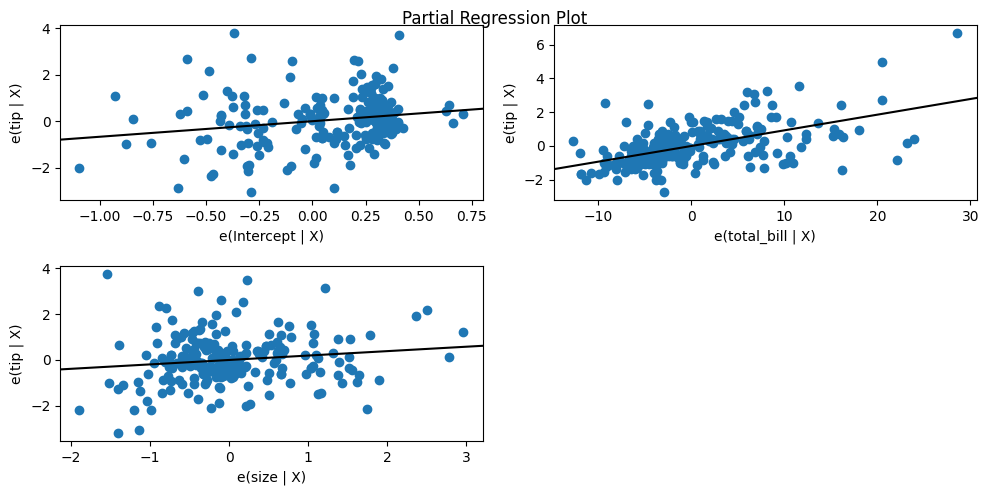

In [19]:
fig = plt.figure(figsize=(10, 5))
fig = sm.graphics.plot_partregress_grid(multi_result, fig=fig);

Un tracé de régression partielle est une forme d’analyse des résidus.

On veut voir l’effet d’une variable sur une autre, en éliminant l’effet de toutes les autes variables.
Les autres variables peuvent avoir un effet sur la variable que l’on cherche à expliquer, mais aussi sur la variable explicative que l’on considère en particulier.
Dans notre exemple, `size` peut avoir un effet sur `tip`, mais aussi sur `total_bill`. Donc si on veut isoler l’effet exclusif de `total_bill` sur `tip`, il faut trouver un moyen d’éliminer l’influence de `size`.

![Diagramme de Venn expliquant les parts expliquées par les régressions](./images/Venn_regression.png)

C’est là qu’interviennent les résidus : si on cherche à isolé la part de `tip` expliquée exclusivement par `total_bill`, il faut supprimer la part de `total_bill` expliquée par `size`, et la part de `tip` expliquée par `size`. Or c’est exactement ce que sont les résidus :

- le résidu de la régression de `tip` sur `size` est la part de la variance de `tip` non expliquée par `size`

- le résidu de la régression de `total_bill` sur `size` est la part de la variance de `total_bill` non expliquée par `size`

Donc la régression du résidu de (`tip` sur `size`) sur le résidu de (`total_bill` sur `size`) est la part de `tip` expliquée exclusivement par `total_bill`

Donc pour tracer les régression partielles, pour chaque variable :

- 1. on réalise une régression en excluant la variable indépendante considérée - par exemple `total_bill` (c’est à dire on crée un modèle expliquant `tip` par toutes les autes variables que `total_bill` – ici `size`, mais on pourrait avoir un modèle plus complexe avec plus de variables). On obtient les résidus `e(tip|X)` de cette régression.

- 2. on réalise ensuite une régression de la variable indépendante considérée (`total_bill` dans notre exemple) et les auters varaibles, et on obtient des résidus `e(total_bill|X)`.

- 3. on trace enfin un scatterplot des résidus (dans notre exemple `e(tip|X)` sur `e(total_bill|X)`) et la droite de régression associée
    - l’axe des ordonnées (y) indique les valeurs des résidus du modèle contenant toutes les variables sauf la variable d’intérêt (`total_bill`) : c’est donc toutes les erreurs qui restent quand on a pris en compte les autres variables que `total_bill`
    - l’axe des abscisses (x) indique les valeurs des résidus du modèle expliquant la variable d’intérêt (`total_bill`) par toutes les autres : la variance que l’on observe n’est pas due aux autres variables

- pour la droite de régression résultante, l’*intercept* vaut forcément zéro, et la pente de la droite est la « force » de l’explication de la variance de `tip` par `total_bill`, indépendemment des autres variables. Ces graphes permettent en outre de voir quels points (qui ne représentent pas les données observées, mais les interpolations sur les erreurs) posent problème avec les plus grandes erreurs :
    - sur l’axe x : les points les plus éloignés de 0 (en positif ou négatif) sont les points pour lesquels la variable d’intérêt (`total_bill`) a une valeur inexpliquée par les autres variables (avec la plus grande erreur)
    - sur l’axe y : les points les plus éloignés de 0 (en positif ou négatif) sont les points pour lesquels le modèle privé de `total_bill` explique le moins la valeur du point (avec la plus grande erreur)
    - donc ce sont les points qui « jouent » le plus dans l’explication de `tip` par `total_bill`
  
En matière d’interprétation de ces graphes, les variables qui contribuent le plus à expliquer la variance sont ceux pour lesquels la pente la plus forte est observée. Chaque tracé est centré sur 0 selon les mêmes unités, les autres variables étant fixées (à leurs valeurs moyennes). 

Il est important de retenir que les points ne représentent pas les données observées (pour s’en rendre compte : la variable `size` ne devrait avoir que des valeurs entières). Pour mieux identifier les points, on peut utiliser le flag `obs_labels` de la méthode `.plot_partregress()` qui trace un graphe spécifique (pas en *grid*), et pour laquelle il faut indiquer explicitement la variable dépendante (ou endogène), la variable indépendante d’intérêt, et les autres variables indépendantes : 

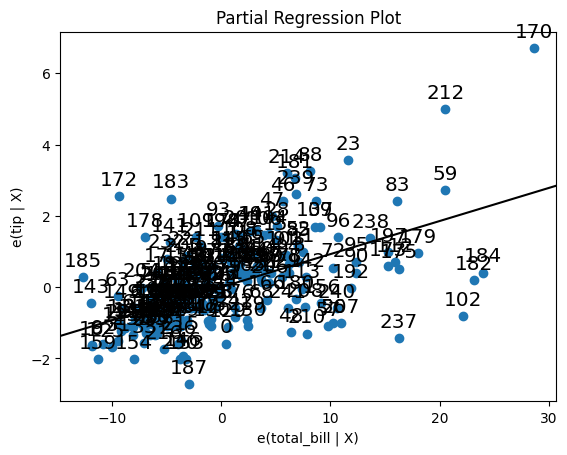

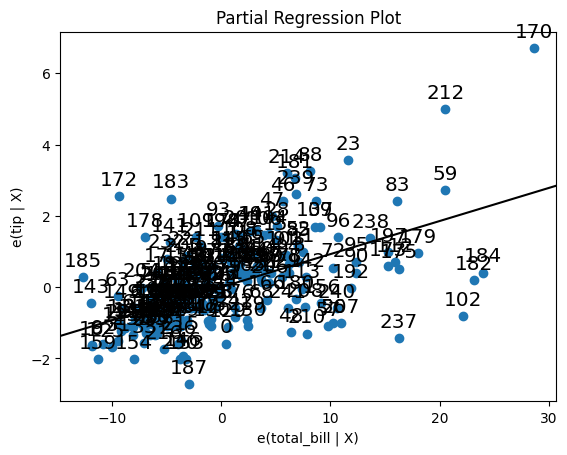

In [22]:
sm.graphics.plot_partregress(endog='tip', exog_i='total_bill',
                              exog_others=['size'],
                              data=tips_df, obs_labels=True)

### Variables catégorielles

Nous avions vu dans la section précédente que lorsque la régression simple ne permettait pas de gérer les encodages de variables catégorielles qui avaient plus de deux catégories (binaires). Dans ces cas, la régression multivariée va nous aider.

In [24]:
multi_model = smf.ols(formula='tip ~ C(day)', data=tips_df)
multi_result = multi_model.fit()
multi_result.params

Intercept        2.771452
C(day)[T.Fri]   -0.036715
C(day)[T.Sat]    0.221652
C(day)[T.Sun]    0.483680
dtype: float64

In [25]:
tips_df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Une catégorie est associée à l’*intercept*, c’est la base à partir de laquelle les coefficients vont être interprétés : 

* le modèle prédit des pourboires de 2,77\\$ le jeudi (la moyenne de ce jour), 
* une baisse de -0,04\\$ le vendredi, 
* une hausse (relativement au jeudi) de 0,22\\$ le samedi 
* et une hausse (toujours relativement au jeudi) de 0,48\\$ le dimanche

Si on veut par exemple que chaque coefficient corresponde plutôt aux valeurs moyennes de ces catégories, il faut supprimer l’intercept du modèle. Dans ce cas on peut écrire la formule ainsi, en rajoutant simplement un `-1` :

In [26]:
multi_model = smf.ols(formula='tip ~ C(day) -1', data=tips_df)
multi_result = multi_model.fit()
multi_result.params

C(day)[Thur]    2.771452
C(day)[Fri]     2.734737
C(day)[Sat]     2.993103
C(day)[Sun]     3.255132
dtype: float64

## Danger de la multicolinéarité

Les dernières sections précédentes (indépendance des variables et résidus, encodage des variables catégorielles) devrait attirer votre attention sur un fait : les variables peuvent s’influencer les unes les autres. Soit complètement (les variables ont un rapport de proportionnalités entre elles) ou juste une covariance. Les effets sur une régression peuvent être dévasgtateurs.

Il est toujours bon d’étudier la matrice de corrélations pour bien s’assurer de l’indépendance des variables avant des les choisirs conjointement dans un modèle.

Pour rappel :

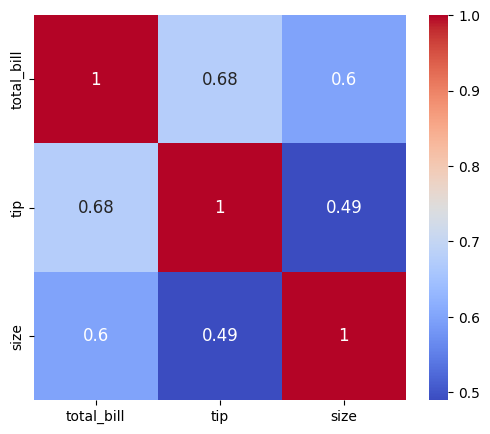

In [27]:
plt.figure(figsize=(6,5))
sns.heatmap(tips_df[['total_bill', 'tip', 'size']].corr(), 
            cmap='coolwarm', 
            annot = True, # affiche les valeurs dans les cellules
            annot_kws={"size": 12}); # taille des chiffres dans les cellulles

On voit que la variable `size` et la variable `total_bill` sont corrélées : il n’est peut-être pas judicieux de les faire intervenir conjointement dans un modèle de régression. On ne peut pas faire varier la taille du repas sans faire varier l’addition, naturellement…

Pour voir les effet négatif de la colinéarité, construisons une variable complètement colinéaire :

In [29]:
tips_df['var_col'] = 3 * tips_df['size'] - 0.5 * tips_df['total_bill']
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,var_col
0,16.99,1.01,Female,No,Sun,Dinner,2,-2.495
1,10.34,1.66,Male,No,Sun,Dinner,3,3.830
2,21.01,3.50,Male,No,Sun,Dinner,3,-1.505
3,23.68,3.31,Male,No,Sun,Dinner,2,-5.840
4,24.59,3.61,Female,No,Sun,Dinner,4,-0.295


Faisont intervenir cette variable dans un modèle avec `total_bill` et `size` :

In [30]:
col_model = smf.ols(formula='tip ~ total_bill + size + var_col', data=tips_df)
col_result = col_model.fit()
col_result.params

Intercept     0.668945
total_bill    0.118637
size          0.037055
var_col       0.051847
dtype: float64

Les coefficients n’ont plus rien à voir !
Voyons voir les autres indicateurs :

In [31]:
col_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        01:34:10   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.1186      0.010     11.741      0.000       0.099       0.139
size           0.0371      0.010      3.834      0.000       0.018       0.056
var_col        0.0518      0.025      2.054      0.041       0.002       0.102
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                     6.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

À première vue les indices sont pas mal : un indice de Fisher qui crève le plafond, les coefficients pris individuellement sont significatifs, mais il est vrai que la nouvelle variable est un peu limite (*p*= 0.041). Mais `statsmodels` nous envoie un petit avertissement (cf. note 2)…

Amusons nous à altérer légèrement une des variables :

In [32]:
tips_df.loc[0, 'total_bill'] = tips_df.loc[0, 'total_bill'] * 1.01
col_model = smf.ols(formula='tip ~ total_bill + size + var_col', data=tips_df)
col_result = col_model.fit()
col_result.params

Intercept      0.686183
total_bill    -9.584688
size          58.252806
var_col      -19.354907
dtype: float64

L’estimation des coefficients est totalement instable !

In [33]:
col_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     71.96
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.14e-33
Time:                        01:40:35   Log-Likelihood:                -346.68
No. Observations:                 244   AIC:                             701.4
Df Residuals:                     240   BIC:                             715.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6862      0.193      3.550      0.000       0.305       1.067
total_bill    -9.5847      5.962     -1.608      0.109     -21.330       2.161
size          58.2528     35.772      1.628      0.105     -12.215     128.721
var_col      -19.3549     11.925     -1.623      0.106     -42.846       4.136
==============================================================================
Omnibus:                       25.623   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.975
Skew:                           0.555   Prob(JB):                     2.32e-11
Kurtosis:                       4.893   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plus aucun coefficient n’est significatif ! Bien que l’indice de Fisher reste élevé et le *R<sup>2</sup> > 0…

Et si on ajoute un terme aléatoire pour casser un peu la colinéarité (forte, mais pas complète) : 

In [35]:
tips_df['total_bill'] = tips_df['total_bill'] + np.random.rand(tips_df.shape[0])
col_model = smf.ols(formula='tip ~ total_bill + size + var_col', data=tips_df)
col_result = col_model.fit()
col_result.params

Intercept     0.605673
total_bill    0.123701
size          0.005331
var_col       0.061473
dtype: float64

Alterons encore cette colonne :

In [37]:
tips_df.loc[0, 'total_bill'] = tips_df.loc[0, 'total_bill'] * 1.2
col_model = smf.ols(formula='tip ~ total_bill + size + var_col', data=tips_df)
col_result = col_model.fit()
col_result.params

Intercept     0.726816
total_bill   -0.105024
size          1.379150
var_col      -0.395074
dtype: float64

In [38]:
col_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.57
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           9.40e-33
Time:                        01:49:49   Log-Likelihood:                -347.80
No. Observations:                 244   AIC:                             703.6
Df Residuals:                     240   BIC:                             717.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7268      0.216      3.364      0.001       0.301       1.152
total_bill    -0.1050      0.173     -0.607      0.545      -0.446       0.236
size           1.3791      1.041      1.325      0.187      -0.672       3.430
var_col       -0.3951      0.346     -1.142      0.255      -1.077       0.287
==============================================================================
Omnibus:                       25.790   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.325
Skew:                           0.558   Prob(JB):                     1.95e-11
Kurtosis:                       4.899   Cond. No.                         387.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les problèmes continuent, même si la colinéarité n’est pas absolue.

Comment détecter la colinéarité ? 

`statsmodels` dispose d’une fonction `variance_inflation_¤actor()`, ou « *vif* » qui permet de quantifier la colinéarité (plus le *vif* est élevé, et plus le risque de colinéarité l’est aussi). Il est obtenu à partir de l’inverse du *R<sup>2</sup> de la régression d’une variable contre toutes les autres (plus *R<sup>2</sup> -> 1 et plus le *vif* tend vers l’infini).

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

Pour être utilisée, cette fonction doit recevoir des données qui ont été standardisées :

In [47]:
columns = ['size','tip','total_bill', '] # on ne prend que les variables numériques
tips_std = pd.DataFrame()

for c in columns:
    m = tips_df[c].mean()
    sd = tips_df[c].std()
    tips_std[c] = tips_df[c].apply(lambda x: (x-m)/sd)

tips_std.head()

,size,tip,total_bill
0,-0.598961,-1.436993,0.114611
1,0.452453,-0.967217,-1.059638
2,0.452453,0.362610,0.178251
3,-0.598961,0.225291,0.486682
4,1.503867,0.442111,0.530548


In [48]:
vif(tips_std, 0) # 0 = index of the column considered

np.float64(1.592022022449645)

In [49]:
vif(tips_std, 1)

np.float64(1.871953615426883)

In [51]:
vif(tips_std, 2)

np.float64(2.2190497864000203)

Si on rajoute `var_col` :

In [52]:
columns = ['size','tip','total_bill', 'var_col'] # on ne prend que les variables numériques
tips_std = pd.DataFrame()

for c in columns:
    m = tips_df[c].mean()
    sd = tips_df[c].std()
    tips_std[c] = tips_df[c].apply(lambda x: (x-m)/sd)

tips_std.head()

,size,tip,total_bill,var_col
0,-0.598961,-1.436993,0.114611,-0.087088
1,0.452453,-0.967217,-1.059638,1.683808
2,0.452453,0.362610,0.178251,0.190096
3,-0.598961,0.225291,0.486682,-1.023632
4,1.503867,0.442111,0.530548,0.528876


In [53]:
vif(tips_std, 0)

np.float64(233.06949655453545)

Question : comment on interpréte la valeur du *vif* ? Ou plus précisément : à partir de quelle valeur on commence à se poser des questions ? 

Il semble qu’une valeur de 10 et au-delà doit nous alerter. Mais il n’y a aucune justification théorique (expérience…) : bon sens, connaissance métier, tests (itérations) doivent nous guider…

## Résumé : workflow

* 1. Problème – Récupération de données
* 2. Exploration de base des données pour les comprendre (statistique, dataviz, nettoyage, etc.)
* 3. Hypothèses sur relation linéaire entre des données
* 4. Modèle de régression
* 5. Estimation des coefficient
* 6. Diagnostic du modèle
    * analyse des résidus
    * QQ-plot
    * régression partielles
    * vif (multicolinéarité)
* 7. Résoudre les problèmes (retour en 4.)

Questions pour diagnostic :
* qualité du modèle ? -> R<sup>2</sup>
* significativité du modèle ? -> F-test/p-value 
* confiance dans les coefficients ? -> t-tests/p-values
* l’inférence (test d’hypothèse) est ok ? -> analyse résidus
* multicolinéarité ? -> vif

## Exercices avec un autre dataset : `mpg`

Chargez un autre dataset de `seaborn` : `mpg`. Explorez-le rapidement, et proposez un modèle de régression de la puissance des voitures, ou de leur poids, n’oubliez pas de vérifier les problèmes potentiels (homoscédasticité, colinéarité, etc.)

In [136]:
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# your code / analysis here



Pour vous entraîner, `statsmodels` propose aussi des données exemples.

Voir [la liste]((https://www.statsmodels.org/dev/datasets/index.html) avec descriptions et liens, section « available dataset ».

Voilà une liste rapide :

```
anes96             American National Election Survey 1996
cancer             Breast Cancer Data
ccard              Bill Greene's credit scoring data.
china_smoking      Smoking and lung cancer in eight cities in China.
co2                Mauna Loa Weekly Atmospheric CO2 Data
committee          First 100 days of the US House of Representatives 1995
copper             World Copper Market 1951-1975 Dataset
cpunish            US Capital Punishment dataset.
danish_data        Danish Money Demand Data
elnino             El Nino - Sea Surface Temperatures
engel              Engel (1857) food expenditure data
fair               Affairs dataset
fertility          World Bank Fertility Data
grunfeld           Grunfeld (1950) Investment Data
heart              Transplant Survival Data
interest_inflation (West) German interest and inflation rate 1972-1998
longley            Longley dataset
macrodata          United States Macroeconomic data
modechoice         Travel Mode Choice
nile               Nile River flows at Ashwan 1871-1970
randhie            RAND Health Insurance Experiment Data
scotland           Taxation Powers Vote for the Scottish Parliament 1997
spector            Spector and Mazzeo (1980) - Program Effectiveness Data
stackloss          Stack loss data
star98             Star98 Educational Dataset
statecrime         Statewide Crime Data 2009
strikes            U.S. Strike Duration Data
sunspots           Yearly sunspots data 1700-2008
```
[Rowan Nichols](https://github.com/rowannicholls) propose [un petit script](https://rowannicholls.github.io/python/data/statsmodels_datasets.html) pour lister les datasets disponibles dans `statsmodels`.

Explorez sans réserve !